In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load Fashion MNIST dataset from OpenML
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

# Extract data and labels
x, y = fashion_mnist.data, fashion_mnist.target

# Normalize the data
x = x / 255.0

# Convert labels to integers
y = y.astype(int)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Train a model on the original data
start_time = time.time()
model_original = MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000)
model_original.fit(x_train, y_train)
end_time = time.time()

# Predict on validation and test sets
y_pred_val_original = model_original.predict(x_val)
y_pred_test_original = model_original.predict(x_test)

# Calculate accuracy
accuracy_val_original = accuracy_score(y_val, y_pred_val_original)
accuracy_test_original = accuracy_score(y_test, y_pred_test_original)

print(f"Original Model Validation Accuracy: {accuracy_val_original}")
print(f"Original Model Test Accuracy: {accuracy_test_original}")
print(f"Original Model Training Time: {end_time - start_time} seconds")


Original Model Validation Accuracy: 0.8826666666666667
Original Model Test Accuracy: 0.8828571428571429
Original Model Training Time: 760.2010369300842 seconds


In [3]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Choose n_components to retain 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)

# Train a model on the PCA-transformed data
start_time_pca = time.time()
model_pca = MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000)
model_pca.fit(x_train_pca, y_train)
end_time_pca = time.time()

# Predict on validation and test sets
y_pred_val_pca = model_pca.predict(x_val_pca)
y_pred_test_pca = model_pca.predict(x_test_pca)

# Calculate accuracy
accuracy_val_pca = accuracy_score(y_val, y_pred_val_pca)
accuracy_test_pca = accuracy_score(y_test, y_pred_test_pca)

print(f"PCA Model Validation Accuracy: {accuracy_val_pca}")
print(f"PCA Model Test Accuracy: {accuracy_test_pca}")
print(f"PCA Model Training Time: {end_time_pca - start_time_pca} seconds")


PCA Model Validation Accuracy: 0.8819047619047619
PCA Model Test Accuracy: 0.8846666666666667
PCA Model Training Time: 198.892187833786 seconds


# Feature Selection

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import warnings

# Load dataset
df = pd.read_csv("test.csv")  # Replace with actual file path

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

# Handle missing values separately
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df.fillna(0, inplace=True)  # Ensure no NaNs remain

# Ensure 'day' column is uniform in type before encoding
if 'day' in df.columns:
    df['day'] = df['day'].astype(str)
    label_encoder = LabelEncoder()
    df['day'] = label_encoder.fit_transform(df['day'])

# Drop original categorical columns
df.drop(columns=['day'], errors='ignore', inplace=True)

# Additional Feature Engineering
if 'pressure' in df.columns and 'temperature' in df.columns:
    df['pressure_temperature_interaction'] = df['pressure'] * df['temperature']
if 'pressure' in df.columns:
    df['pressure_squared'] = df['pressure'] ** 2
    df['log_pressure'] = np.log1p(df['pressure'])  # Log transformation for stability
if 'hour' in df.columns and 'minute' in df.columns:
    df['hour_minute_interaction'] = df['hour'] * df['minute']

# Define features and target
X = df.drop(columns=['vapour_temperature'])  # Target is vapour_temperature
y = df['vapour_temperature']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training & Evaluation (Baseline)
def train_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred, squared=False)

# RandomForest Model with more estimators
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rmse_rf = train_evaluate(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"RandomForest RMSE: {rmse_rf}")

# XGBoost Model for comparison
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
rmse_xgb = train_evaluate(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"XGBoost RMSE: {rmse_xgb}")


RandomForest RMSE: 9.785539069083116
XGBoost RMSE: 10.445371992691438


# K-Means

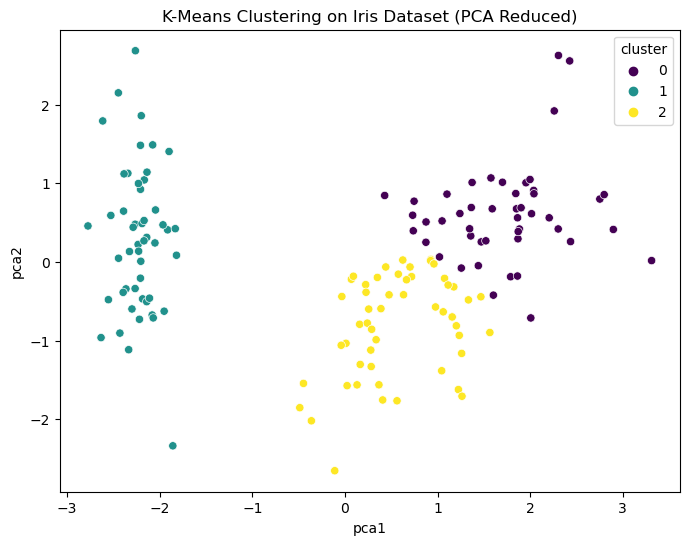

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], hue=df['cluster'], palette='viridis')
plt.title("K-Means Clustering on Iris Dataset (PCA Reduced)")
plt.show()
